#Analysis of employment exit survey
##Data description
In this notebook, we will work with exit surveys collected from Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) in Queensland, Australia. You can find the survey in following link:
https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
####DETE survey dataset:
822 data points with 56 columns
- ID: An id to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment
####TAFE survey dataset:
702 data point with 72 columns
- Record ID: An id to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
##Requirement
From both of the data, our stakeholders want to answer the following questions:
- Are short-term employees resigning due to dissatisfaction? How about long-term employees?
- Are younger employees quitting because of dissatisfation? How about older employees?

In [82]:
# Import necessary libraries
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

##Overview

In [83]:
dete_survey.info()
dete_survey.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID
count,822.000000
mean,411.693431
std,237.705820
min,1.000000
25%,206.250000
50%,411.500000
75%,616.750000
max,823.000000


In [84]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [85]:
dete_survey[:5]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [86]:
tafe_survey.info()
tafe_survey.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,CESSATION YEAR
count,7.020000e+02,695.000000
mean,6.346026e+17,2011.423022
std,2.515071e+14,0.905977
min,6.341330e+17,2009.000000
25%,6.343954e+17,2011.000000
50%,6.345835e+17,2011.000000
75%,6.348005e+17,2012.000000
max,6.350730e+17,2013.000000


In [87]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [88]:
tafe_survey[:5]

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


###Findings:
- Most of colums'value comes with string format.
- Both surveys cover similar topics but are stored in different format and questions.
-There are many redundant columns we do not need to answer our stakeholders'questions.
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN

##Reshape data and rename columns

In [89]:
# Changing 'Not Stated' to NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [90]:
# Dropping unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Now the data is more comprehensive, let's unify the names of columns so we can combine two datasets at ease later

In [91]:
# Lowercase dete column names and rename tafe datasets columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
mapper = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapper=mapper, axis=1)

##Cleaning raw data
###Date columns
Verify abnormality in year column
The starting year has to be smaller or equal to ceasing year

In [92]:
dete_survey_updated['cease_date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
02/2014      2
04/2014      2
04/2013      2
07/2014      2
08/2012      2
07/2012      1
2010         1
09/2014      1
11/2012      1
2014         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

The data has been stored with months making it hard for interpetation. Let's chage it using regex

In [93]:
pattern = r'([1-2][0-9]{3})'
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.extract(pattern)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [94]:
#Make sure the data is sane
dete_survey_updated['institute_service'] = dete_survey_updated['cease_date'].astype(float, dropna=True) - dete_survey_updated['dete_start_date']
dete_survey_updated['institute_service'].value_counts().sort_index(ascending=True)

0.0     31
1.0     36
2.0     23
3.0     31
4.0     28
5.0     34
6.0     27
7.0     17
8.0     14
9.0     20
10.0    13
11.0    13
12.0    14
13.0    18
14.0    14
15.0    18
16.0    15
17.0    16
18.0    11
19.0    13
20.0    12
21.0    15
22.0    22
23.0    17
24.0    16
25.0    10
26.0    11
27.0     7
28.0     8
29.0     8
30.0     4
31.0    10
32.0    12
33.0    11
34.0    12
35.0    14
36.0     7
37.0    21
38.0    15
39.0    14
40.0     8
41.0    11
42.0    13
43.0    17
44.0     7
45.0     5
46.0     1
48.0     1
49.0     3
50.0     1
Name: institute_service, dtype: int64

In [95]:
tafe_survey_updated['cease_date'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

There are no major issue with the years now.

##Are short-term employees resigning due to dissatisfaction? How about long-term employees?
First, let's have a look at the unique values in each dataset's 'separationtype' column

In [96]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [97]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Now our stakeholders are only interested in respondents who resigned so we will limit our dataset to those whose 'seperationtype' includes 'Resignation'

In [98]:
pattern = r'Resignation'
bool_de = dete_survey_updated['separationtype'].str.contains(pattern, na=False)
bool_ta = tafe_survey_updated['separationtype'].str.contains(pattern, na=False)
dete_resignations = dete_survey_updated.copy()[bool_de]
tafe_resignations = tafe_survey_updated.copy()[bool_ta]

We will use below columns to identify the dissatisfaction in jobs for both dataset:
Tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
Dete_suvey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload
We will combine all the columns above to one column 'dissatisfied' in each dataset and input a boolean value to present these columns:
- 'dissatisfied' return True if any columns is True
- 'dissatisfied' return False if all columns is False
- 'dissatisfied' return NaN if all columns is NaN

In [99]:
# Create a mask function
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif '-' in val:
        return False
    else:
        return True
# Apply mask on tafe survey
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
# Create new column 'dissatisfied' on both dataset
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)
# Make a copy
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Let's recap what we have done until now:
- Clean our datasets
- Verify data quality
- Create new 'institute_service' column
- Clean 'Contributing Factors' columns
- Create new 'dissatisfied' column indicating if an employee resigned because they were dissatisfied in some way

Now we are finally ready to combine our datasets. Lets start by adding a column to distinguish the two.

In [100]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

One of our important column would be 'institute_service'. However this column is in disarray after the combination. We will use the modified definitions below to convert these numbers into categories:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [101]:
combined['institute_service'].value_counts()
combined['institute_service'] = combined['institute_service'].astype(str).str.extract(r'(\d+)')
combined['institute_service'] = combined['institute_service'].astype(float)
def mapping(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'New'
    if val >= 3 and val <= 6:
        return 'Experience'
    if val >= 7 and val <= 10:
        return 'Established'
    if val > 11:
        return 'Veteran'
combined['service_cat'] = combined['institute_service'].apply(mapping)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



Look at how clean and nice our result is

In [102]:
combined[['service_cat','dissatisfied']][:5]

,service_cat,dissatisfied
3,Established,False
5,Veteran,True
8,Experience,False
9,Veteran,True
11,Experience,False


We finally are able to make a plot answering our stakeholders' question:

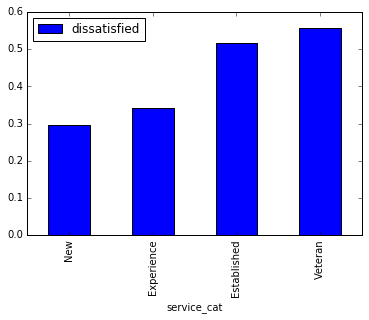

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
pv_combined = combined.pivot_table(values='dissatisfied', index='service_cat')
pv_combined.iloc[[2, 1, 0, 3]].plot(kind='bar')

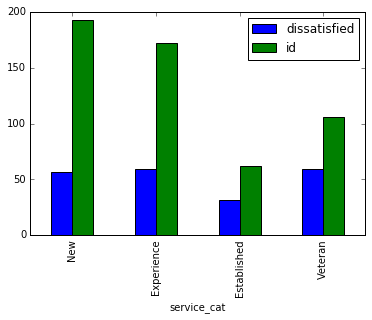

In [108]:
# Dissatisfied employees by categories and number
pv_combined = combined.pivot_table(values=['dissatisfied', 'id'], index=['service_cat'], aggfunc={'dissatisfied': np.sum, 'id':'count'})
pv_combined.iloc[[2, 1, 0, 3]].plot(kind='bar')

###Findings
Short-term employees are less dissatisfied about their job compared to their seniors. 
Source of dissatisfaction is on account of:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

##Are younger employees quitting because of dissatisfation? How about older employees?
First, let's have a look at our 'age' column

In [105]:
combined['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

- The 'age' column has repeated information that need some cleaning.
- According to Organisation for Economic Co-operation and Development, we will devide the 'age' column into age groups as follow:
25 or younger: Fresher
25 to 50: Those in their prime working lives
55 or older: Senior

In [106]:
def mapping(val):
    if val == '20 or younger' or val == '21-25' or val == '21  25':
        return "Fresher"
    if val == '26-30' or val == '26  30' or val == '31-35' or val == '31  35' or val == '36-40' or val == '36  40' or val == '36-40' or val == '41-45' or val == '41  45' or val == '46-50' or val == '46  50' or val == '51-55':
        return 'Prime'
    if val == '56 or older' or val == '56-60' or val == '61 or older':
        return 'Senior'
combined['age_categories'] = combined['age'].apply(mapping)
combined['age_categories'].value_counts()

Prime      446
Senior      78
Fresher     72
Name: age_categories, dtype: int64

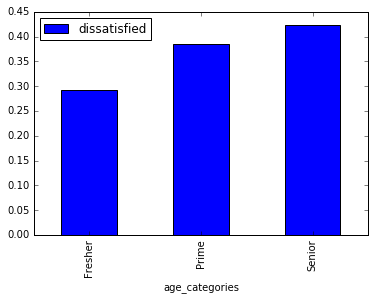

In [107]:
pv_combined = combined.pivot_table(values='dissatisfied', index='age_categories')
pv_combined.plot(kind='bar')

###Findings:
Younger employees are less likely to resign from dissatisfaction while senior employees are about 10% more likely to resign due to the same reason.